# Invoice Classification From Scanned Documents

In modern financial operations, a large number of documents are being processed every day. How document can and should processed depends on the type of document at hand, therefore identifying the type of document is a important baseline step within document processing. Automating the task of identifying the type of document will be the goal of this project, as having a algorithm that perform such a task can reduce manual, repetitive labour and improve the processing time of these documents.

In this project, I will tackle this task using Convolutional Neural Networks (CNNs) with pytorch and train them on gray-scaled images of the documents. The goal of these CNNs is to learn the structural layout and pattern that each document type has and use to that knowledge to distinguish between the different document types. The dataset that will be used to train this CNNs is the [RVL-CDIP dataset](https://huggingface.co/datasets/aharley/rvl_cdip), which consists of 400.000 grayscale images of documents that do not exceed 1000 pixels. There exists 16 different classes in the entire dataset with 25.000 images for each class. The dataset is split into 320.000 training images, 40.000 validation images, and 40.000 test images. 

The main goal of this project is to create model that can take a image input and accurately classify its document type, here the goal accuracy is 90% or higher. Our Secondary goals would be for the model to be light in size and quick with its output.

References: A. W. Harley, A. Ufkes, K. G. Derpanis, "Evaluation of Deep Convolutional Nets for Document Image Classification and Retrieval," in ICDAR, 2015; [study link](https://adamharley.com/icdar15/)

## Loading Dataset

In [2]:
from datasets import load_dataset

ds = load_dataset("aharley/rvl_cdip", trust_remote_code=True)

rvl-cdip.tar.gz:  21%|##        | 10.1G/48.9G [00:00<?, ?B/s]

c:\Users\sheri\AppData\Local\Programs\Python\Python313\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\sheri\.cache\huggingface\hub\datasets--rvl_cdip. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


train.txt:   0%|          | 0.00/13.7M [00:00<?, ?B/s]

test.txt:   0%|          | 0.00/1.72M [00:00<?, ?B/s]

val.txt:   0%|          | 0.00/1.72M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/320000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/40000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/40000 [00:00<?, ? examples/s]

Loading dataset shards:   0%|          | 0/77 [00:00<?, ?it/s]

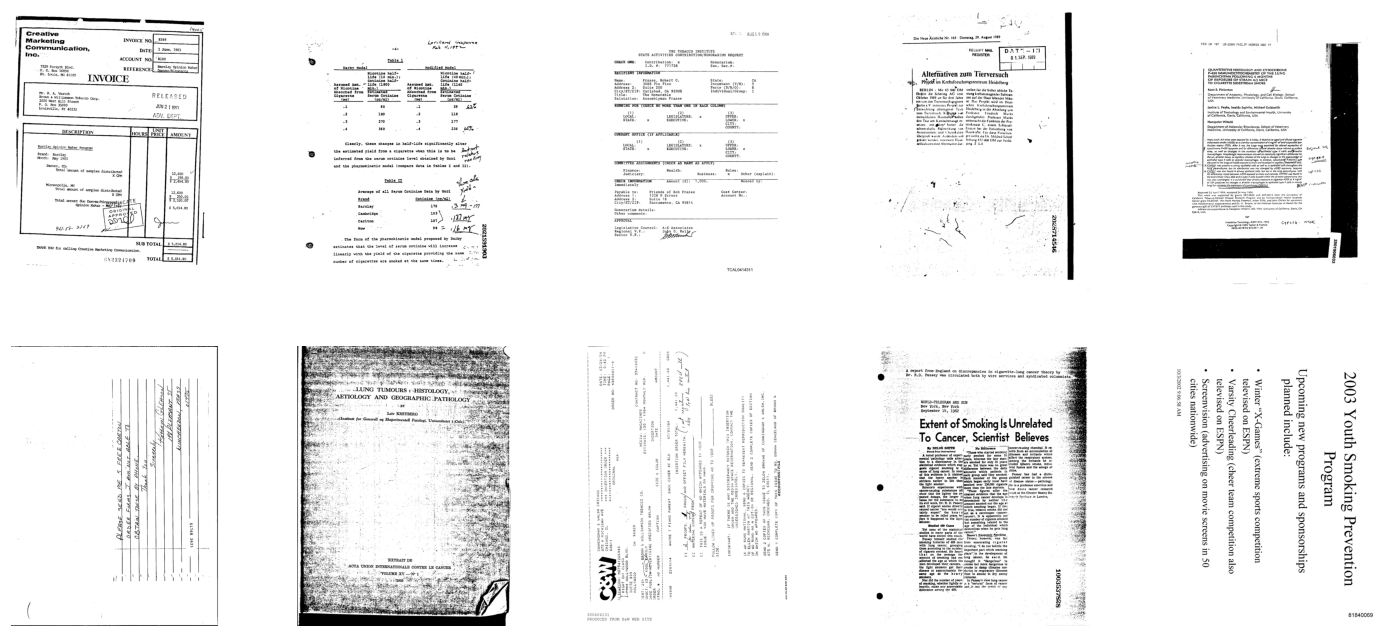

In [15]:
#ds.save_to_disk("local_rvlcdip")

import numpy as np
from matplotlib import pyplot

fig, axes = pyplot.subplots(2, 5, figsize=(18, 8))

# Select and plot 10 samples
index = 0
for i in range(2):
    for j in range(5):
        img = ds['train'][index]['image']
        axes[i][j].imshow(img, cmap='gray')
        axes[i][j].axis('off')
        index +=1

pyplot.show()